# Test vmap and differentiation with grad

- Voir aussi example google collab : https://colab.research.google.com/drive/1UQA6hQIGKVQdzN2rp3OyDDs--od1hixV?usp=sharing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [2]:
from jax import make_jaxpr
import jax.numpy as jnp
import numpy as np
from functools import partial
from jax import grad, jit, vmap,jacobian,jacfwd,jacrev,hessian
from jax.lax import cond

In [3]:
def func1(x,y):
    return jnp.exp(-x**2-3*y**2)
def func2(x,y):
    return jnp.exp(2*x)*jnp.sin(y)

In [4]:
x=1.1
y=2.2
flagtree = {"flag":True}

In [5]:
flag = flagtree["flag"]

In [6]:
operands = x,y

In [7]:
cond(flag,func1,func2,x,y)

I0000 00:00:1698597538.437598       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Array(1.4741701e-07, dtype=float32, weak_type=True)

In [8]:
#@partial(jit, static_argnums=2)
def func(x,y,flag_tree):   
    flag = flag_tree["flag"]
    return cond(flag,func1,func2,x,y)

In [9]:
flagtree

{'flag': True}

In [10]:
def twomap(f):
      # matrice de dim NxM
      # [[f(x_0,y_0),f(x_0,y_1),....,f(x_0,y_M)],
      #  [f(x_1,y_0),f(x_1,y_0),....,f(x_1,y_M)],
      #  ...
      #  [f(x_N,y_0),f(x_N,y_0),....,f(x_N,y_M)]]
      #
      return jit(vmap(vmap(f, in_axes=(0, None,None)), in_axes=(None, 0,None))) #le jit est superflu ici.

In [11]:
def onemap1(f):
    return jit(vmap(f, in_axes=(0, None,None)))

def onemap2(f):
    return jit(vmap(f, in_axes=(None,0,None)))

In [12]:
x = jnp.linspace(-2,2,50)
y = jnp.linspace(-2,2,100)

In [13]:
xx,yy = jnp.meshgrid(x,y)

In [14]:
func_array1 = func(xx,yy,flagtree)
func_array2 = twomap(func)(x,y,flagtree)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Gaussian 2D')

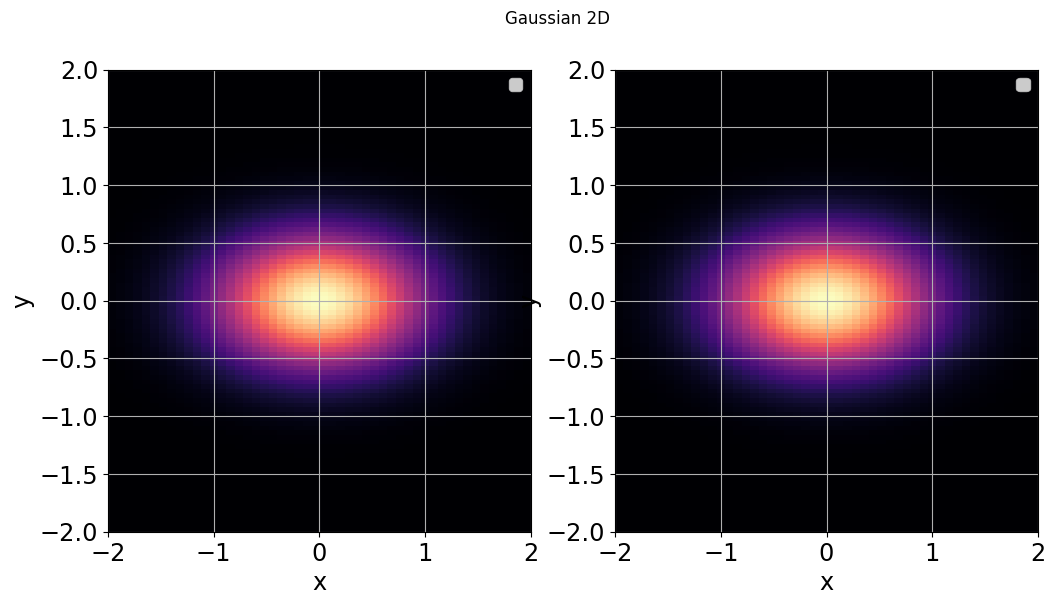

In [15]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(func_array1,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
ax2.imshow(func_array2,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')

ax1.set_xlabel("x")
ax1.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax1.grid()
ax1.legend()

ax2.set_xlabel("x")
ax2.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.grid()
ax2.legend()

title = f"Gaussian 2D"
plt.suptitle(title)

## First order derivative

### derivative step by step

In [16]:
grad_x = grad(func,argnums=0)
grad_y = grad(func,argnums=1)

In [17]:
func_grad_x = vmap( vmap(grad_x,in_axes=(0, None, None) ), in_axes=(None,0, None) )
func_grad_y = vmap( vmap(grad_y,in_axes=(0, None, None) ), in_axes=(None,0, None) )

In [18]:
func_grad_x_array =  func_grad_x(x,y,flagtree) 
func_grad_y_array =  func_grad_y(x,y,flagtree) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


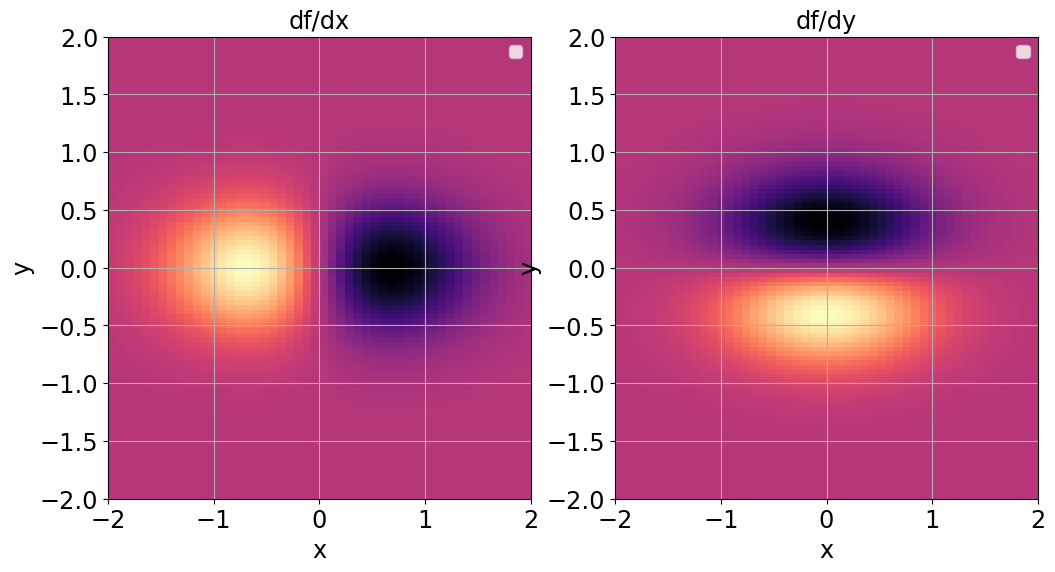

In [19]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax1 = axs[0]

ax1.imshow(func_grad_x_array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dx"
ax1.set_title(title)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax1.grid()
ax1.legend()

ax2 = axs[1]
ax2.imshow(func_grad_y_array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dy"
ax2.set_title(title)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.grid()
ax2.legend()

### Apply grad on both arguments

In [20]:
grad_func = grad(func,argnums=(0,1))

In [21]:
map_grad_func = vmap( vmap(grad_func,in_axes=(0, None, None) ), in_axes=(None,0, None) )

In [22]:
map_grad_func_array = map_grad_func(x,y,flagtree) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


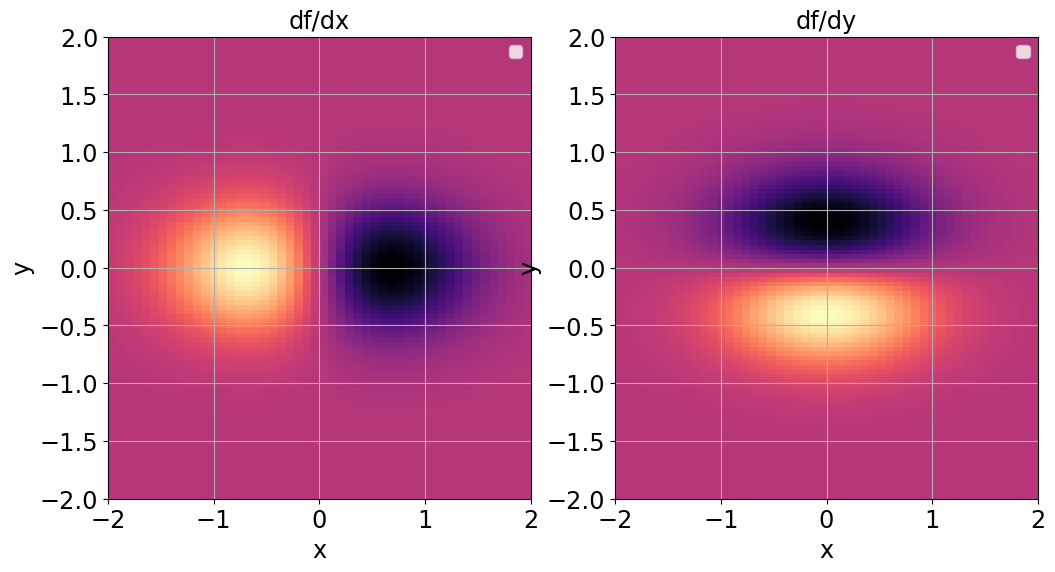

In [23]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax1 = axs[0]

ax1.imshow(map_grad_func_array[0],origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dx"
ax1.set_title(title)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax1.grid()
ax1.legend()

ax2 = axs[1]
ax2.imshow(map_grad_func_array[1],origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dy"
ax2.set_title(title)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.grid()
ax2.legend()

## Second order derivative

### Calculation of derivative step by step

In [24]:
grad_xx = grad(grad_x,argnums=0)
grad_yy = grad(grad_y,argnums=1)
grad_xy = grad(grad_x,argnums=1)
grad_yx = grad(grad_y,argnums=0)

In [25]:
func_grad_xx = vmap( vmap(grad_xx,in_axes=(0, None,None) ), in_axes=(None,0,None) )
func_grad_yy = vmap( vmap(grad_yy,in_axes=(0, None, None) ), in_axes=(None,0,None) )
func_grad_xy = vmap( vmap(grad_xy,in_axes=(0, None, None) ), in_axes=(None,0,None) )
func_grad_yx = vmap( vmap(grad_yx,in_axes=(0, None, None) ), in_axes=(None,0,None) )

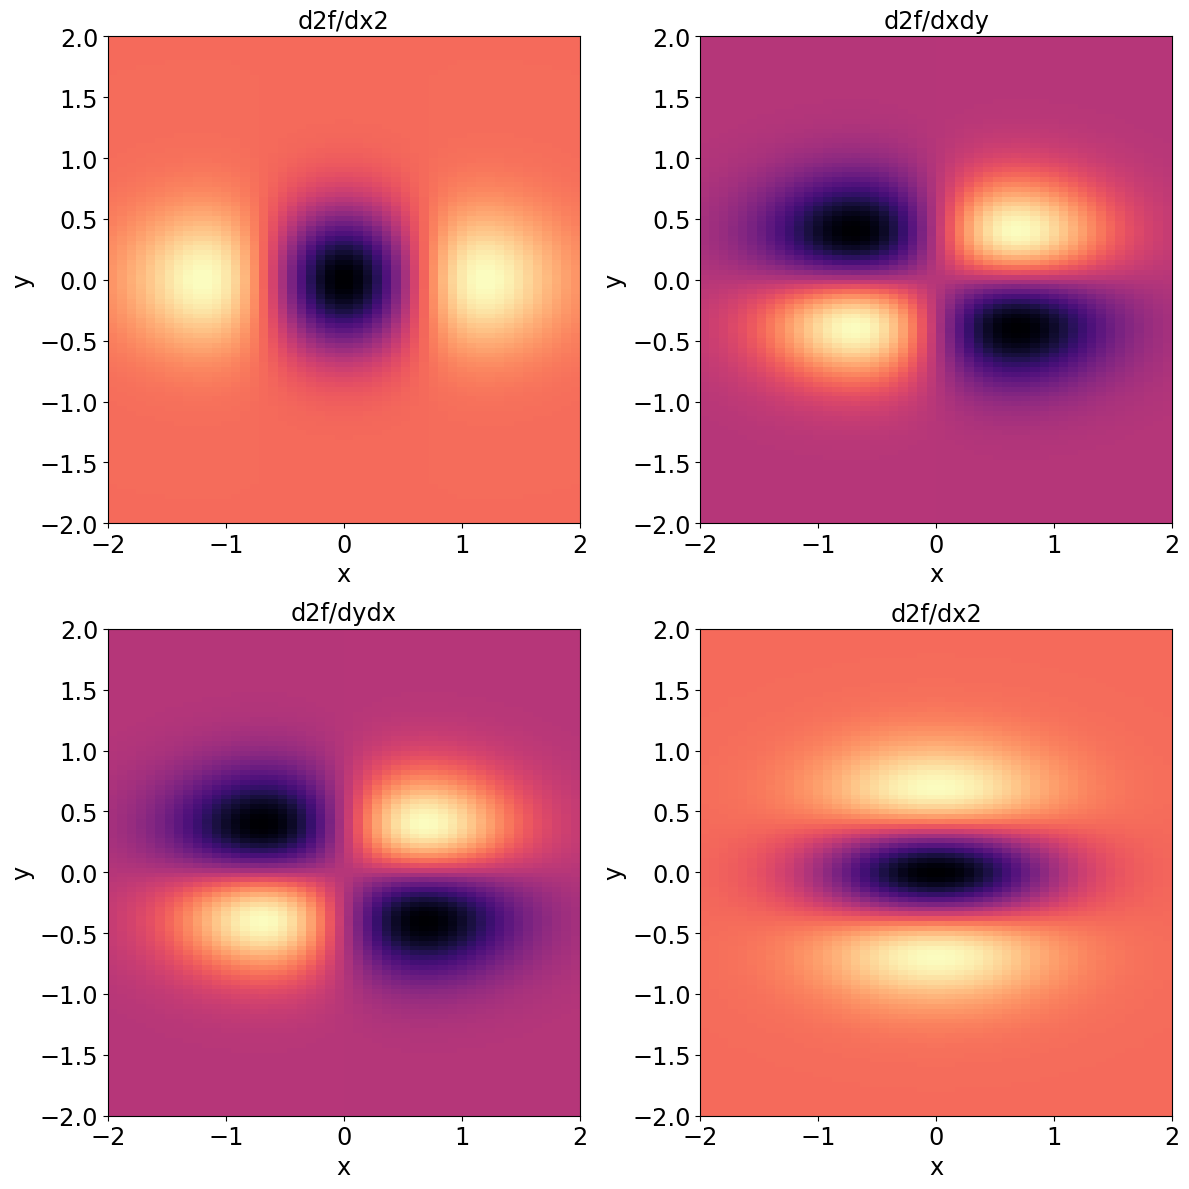

In [26]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
flatten_axes = axes.flatten()
titles = ["d2f/dx2", "d2f/dxdy", "d2f/dydx","d2f/dx2"]
for idx, ax in enumerate(flatten_axes):
    
    if idx == 0:
        array = func_grad_xx(x,y,flagtree)
    elif idx == 1:
        array = func_grad_xy(x,y,flagtree)
    elif idx == 2:
        array = func_grad_yx(x,y,flagtree)
    elif idx == 3:
        array = func_grad_yy(x,y,flagtree)
        
    ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
    ax.set_title(titles[idx])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
plt.tight_layout()    

### With the Hessian

In [27]:
hessian_func = hessian(func, argnums=(0, 1))

In [28]:
print(hessian_func(1.,2.,flagtree))

((Array(4.520659e-06, dtype=float32, weak_type=True), Array(5.4247907e-05, dtype=float32, weak_type=True)), (Array(5.4247907e-05, dtype=float32, weak_type=True), Array(0.00031193, dtype=float32, weak_type=True)))


In [29]:
map_hessian_func = vmap( vmap(hessian_func, in_axes=(0,None,None)), in_axes=(None,0,None))

In [30]:
all_hessian_arrays = map_hessian_func(x,y,flagtree) 

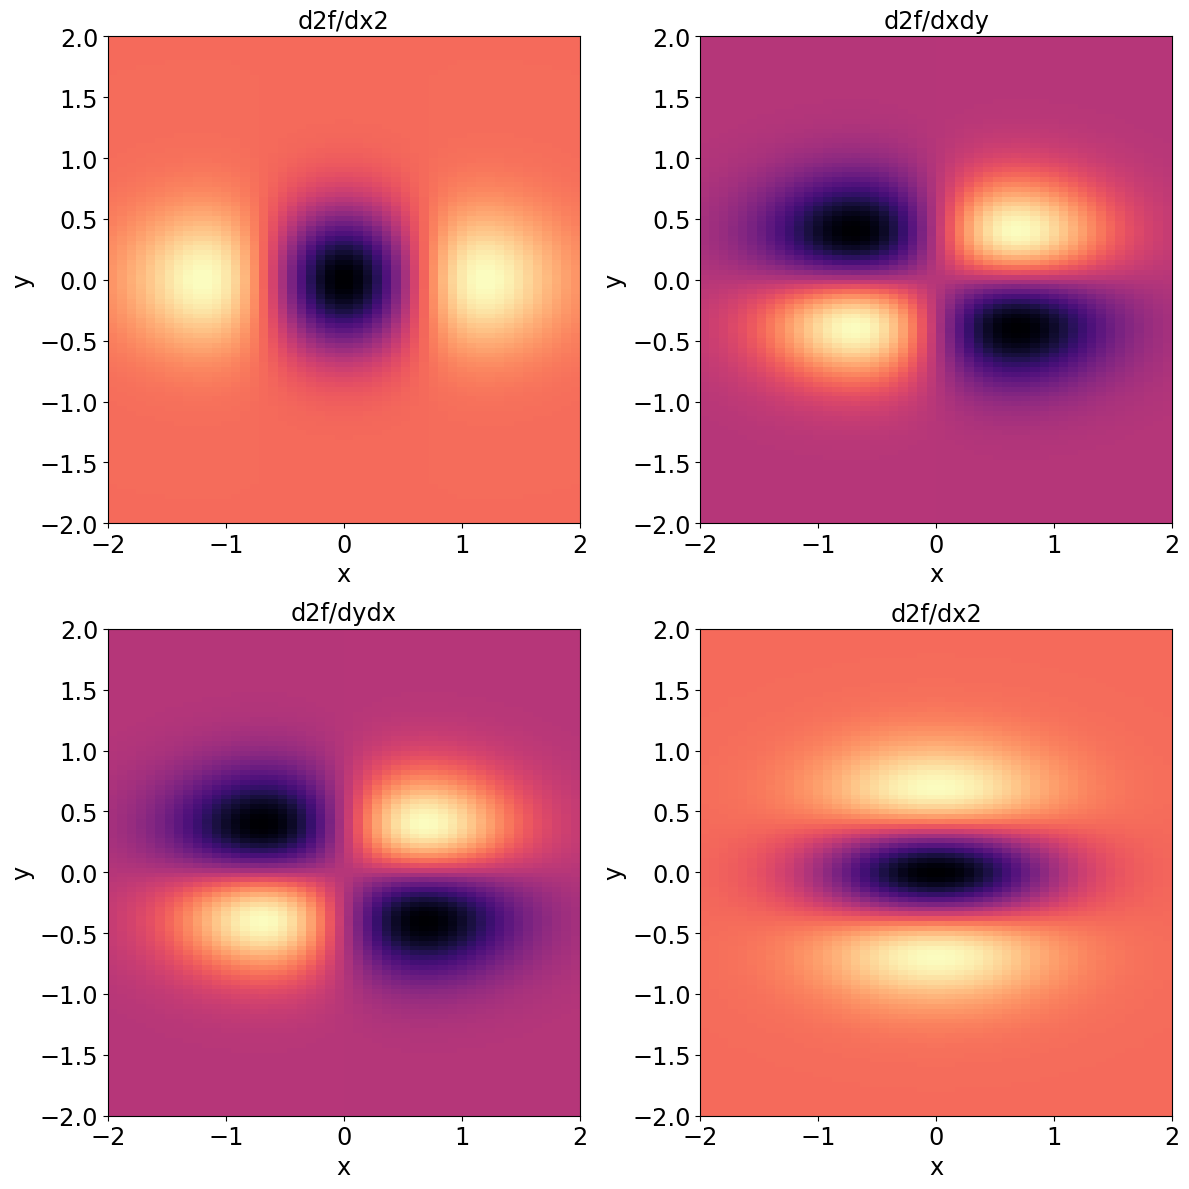

In [31]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
flatten_axes = axes.flatten()
titles = ["d2f/dx2", "d2f/dxdy", "d2f/dydx","d2f/dx2"]
for idx, ax in enumerate(flatten_axes):
    
    if idx == 0:
        array = all_hessian_arrays[0][0] 
    elif idx == 1:
        array = all_hessian_arrays[0][1] 
    elif idx == 2:
        array = all_hessian_arrays[1][0] 
    elif idx == 3:
        array = all_hessian_arrays[1][1] 
            
    ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
    ax.set_title(titles[idx])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
plt.tight_layout()   

# In a class

In [32]:
class A():
    def __init__(self,a=3,ftree=flagtree):
        self.a = a
    
        self.flagtree = ftree
        
    def func(self,x,y):   
        flag = self.flagtree["flag"]
        return cond(flag,func1,func2,x,y)
    
    def f(self,x,y):
        return vmap(vmap(self.func, in_axes=(0, None)),in_axes=(None,0))(x,y)

    def gradf(self,x,y):
        return vmap(vmap(grad(self.func,argnums=(0,1)), in_axes=(0,None)),in_axes=(None,0))(x,y)
    
    def hessianf(self,x,y):
        return vmap(vmap(hessian(self.func,argnums=(0,1)),in_axes=(0,None)),in_axes=(None,0))(x,y)


In [33]:
a = A(a=3,ftree=flagtree)

In [34]:
a.func(1.,2.)

Array(2.2603294e-06, dtype=float32, weak_type=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Gaussian 2D')

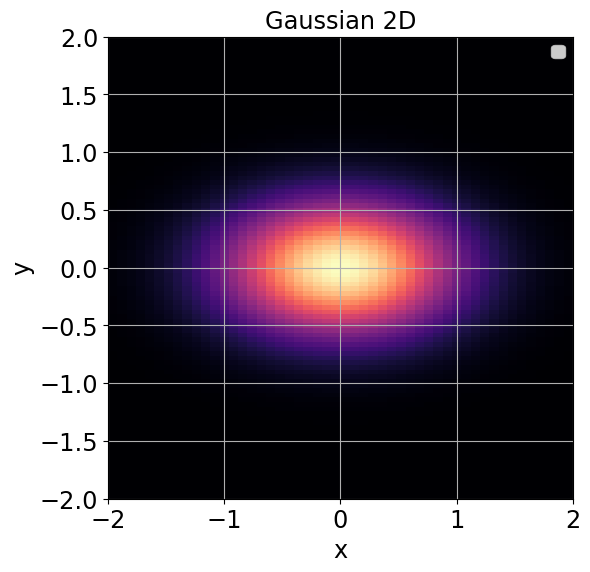

In [35]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.imshow(a.f(x,y),origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')


ax.set_xlabel("x")
ax.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()


title = f"Gaussian 2D"
ax.set_title(title)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


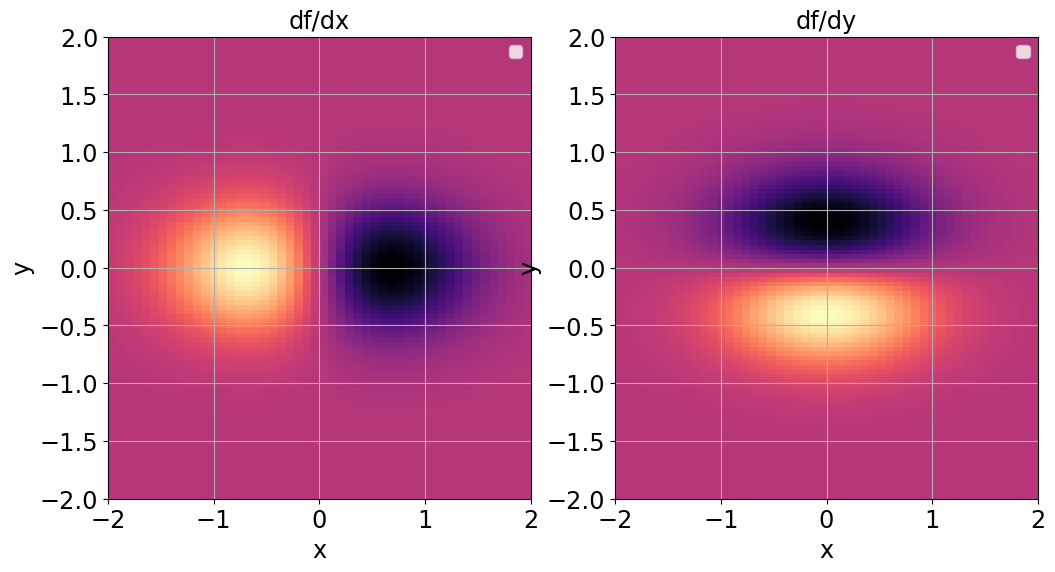

In [36]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
ax1 = axs[0]

ax1.imshow(a.gradf(x,y)[0],origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dx"
ax1.set_title(title)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax1.grid()
ax1.legend()

ax2 = axs[1]
ax2.imshow(a.gradf(x,y)[1],origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
title = f"df/dy"
ax2.set_title(title)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax2.grid()
ax2.legend()

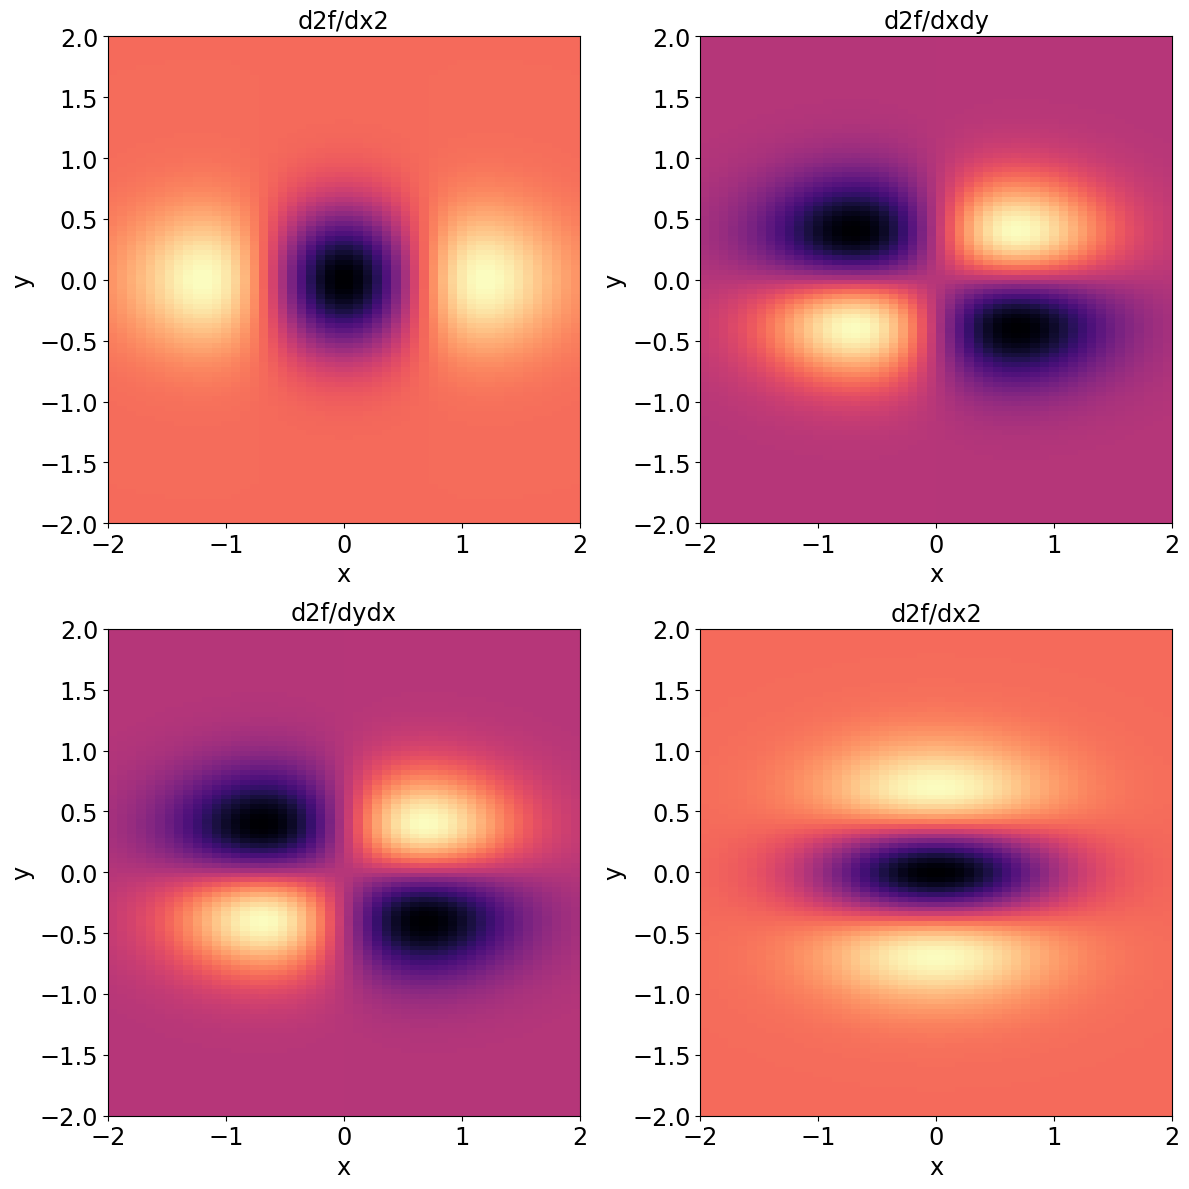

In [37]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
flatten_axes = axes.flatten()
titles = ["d2f/dx2", "d2f/dxdy", "d2f/dydx","d2f/dx2"]
for idx, ax in enumerate(flatten_axes):
    
    if idx == 0:
        array = a.hessianf(x,y)[0][0] 
    elif idx == 1:
        array = a.hessianf(x,y)[0][1] 
    elif idx == 2:
        array = a.hessianf(x,y)[1][0] 
    elif idx == 3:
        array = a.hessianf(x,y)[1][1] 
            
    ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(x.min(),x.max(),y.min(),y.max()),aspect='auto')
    ax.set_title(titles[idx])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
plt.tight_layout()   

# Single map

In [38]:
vect_func_opt1 = onemap1(func)
vect_func_opt2 = onemap2(func)

Text(0.5, 0, 'y')

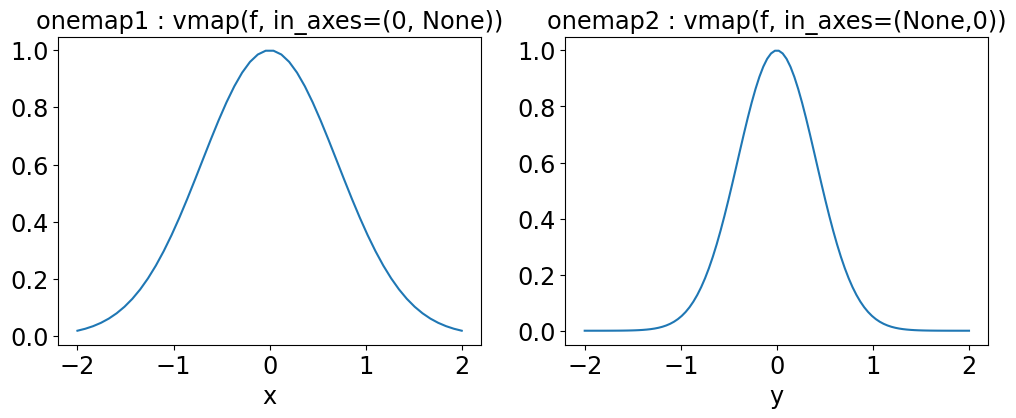

In [39]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
ax1 = axs[0]

ax1.plot(x,vect_func_opt1(x,0,flagtree))
ax1.set_title("onemap1 : vmap(f, in_axes=(0, None))")
ax1.set_xlabel("x")

ax2 = axs[1]
ax2.plot(y,vect_func_opt2(0,y,flagtree))
ax2.set_title("onemap2 : vmap(f, in_axes=(None,0))")
ax2.set_xlabel("y")
